In [250]:
import matplotlib.pyplot as plt
import numpy as np

import methods
import DanyaLab2.methods as methods2

In [251]:
from scipy.optimize import approx_fprime
import math

np.random.seed(12)


def generate_points(n, f, rg=1):
    X = rg * np.random.rand(n)
    y = []
    X_err = X # + 0.2 * np.random.randn(n)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


def mse(f, w, X, y):
    diff = 0
    for i in range(0, len(X)):
        diff += (f(w)(X[i]) - y[i]) ** 2
    return diff


def mse_func(f, X, y):
    return lambda w: mse(f, w, X, y)


def grad_calculator(x, func, dim):
    h = 1e-5
    res = []
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

In [252]:
def grad_func(f, dim):
    return lambda x: grad_calculator(x, f, dim)


def func(p):
    return lambda x: p[0] + p[1] * x + p[2] * x ** 2 + p[3] * (x + 1) ** 3 + p[4] * x ** 4

expected = [-1.0, 0.05, -3.0, 0.5, -0.1]


def target_func(x):
    return func(expected)(x)


n = 10
dim = 5
rg = 7
(X, y) = generate_points(n, target_func, rg)
f = mse_func(func, X, y)
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

start = np.ones(dim)

In [253]:
def make_plot(ws, names, colors):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 7, forward=True)
    plt.plot(X, y, 'b.')
    ls = []
    t1 = np.arange(0.0, rg + 0.01, 0.1)
    for (w, name, color) in zip(ws, names, colors):
        Y = []
        for x in t1:
            Y.append(func(w)(x))
        l, = plt.plot(t1, Y, '-', color=color, linewidth=1, alpha=0.8)
        ls.append(l)
        names.append(name)
    plt.ylim(-100, 50)
    ax.legend(ls, names, loc='upper right', shadow=True, prop={'size': 10})
    plt.xlabel('x')
    plt.ylabel('y')

In [254]:
def print_table(infos, names):
    for i, info in enumerate(infos):
        print("{} & {}  \\\\".format(names[i], info[0][-1]))

    print("===============Table===============")
    for i, info in enumerate(infos):
        # print("\hline")
        # print("{} & \\seqsplit{{{:.4f}}} & {} & {} & {:.4f} & {} \\\\".format(names[i],
        #                                                                       np.linalg.norm(expected - info[0][-1]),
        #                                                                       info[1],
        #                                                                       info[2], info[3], info[4]))
        print("{} | {:.4f} | {} | {} | {:.4f}".format(names[i],
                                                                              np.linalg.norm(expected - info[0][-1]),
                                                                              info[1],
                                                                              info[2], info[3]))


def gauss_f(p):
    return [func(p)(x_i) for x_i in X]


def jacobian(p):
    n = len(X)
    m = len(p)
    h = 0.001
    J = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            p_minus = p.copy()
            p_plus = p.copy()
            p_minus[j] -= h
            p_plus[j] += h
            J[i, j] = (func(p_plus)(X[i]) - func(p_minus)(X[i])) / (2 * h)
    return J

[1.0791399  5.18034788 1.84320511 3.73617575 0.10202474 6.43122906
 6.30500398 0.23394999 6.69864535 0.96046525]
[-1.          0.04999999 -3.          0.5        -0.1       ]
[-0.9999876   0.04999879 -2.99998395  0.49999745 -0.09999977]
[-1.    0.05 -3.    0.5  -0.1 ]
[-1.42014195  1.55388508 -0.8193607   0.10773778 -0.06413197]
[ 0.99920544  0.99517133  0.96986981  0.70391033 -0.21321719]
[ 0.99903021  0.99458483  0.96758784  0.68606101 -0.24736899]
[-0.01311193 -0.01735026 -0.01998945 -0.02100377 -0.02311479]
BFGS & [-1.          0.04999999 -3.          0.5        -0.1       ]  \\
L-BFGS & [-0.9999876   0.04999879 -2.99998395  0.49999745 -0.09999977]  \\
Gauss-Newton & [-1.    0.05 -3.    0.5  -0.1 ]  \\
Powell Dog Leg & [-1.42014195  1.55388508 -0.8193607   0.10773778 -0.06413197]  \\
AdaGrad & [ 0.99920544  0.99517133  0.96986981  0.70391033 -0.21321719]  \\
RMSProp & [ 0.99903021  0.99458483  0.96758784  0.68606101 -0.24736899]  \\
Adam & [-0.01311193 -0.01735026 -0.01998945 -0.02

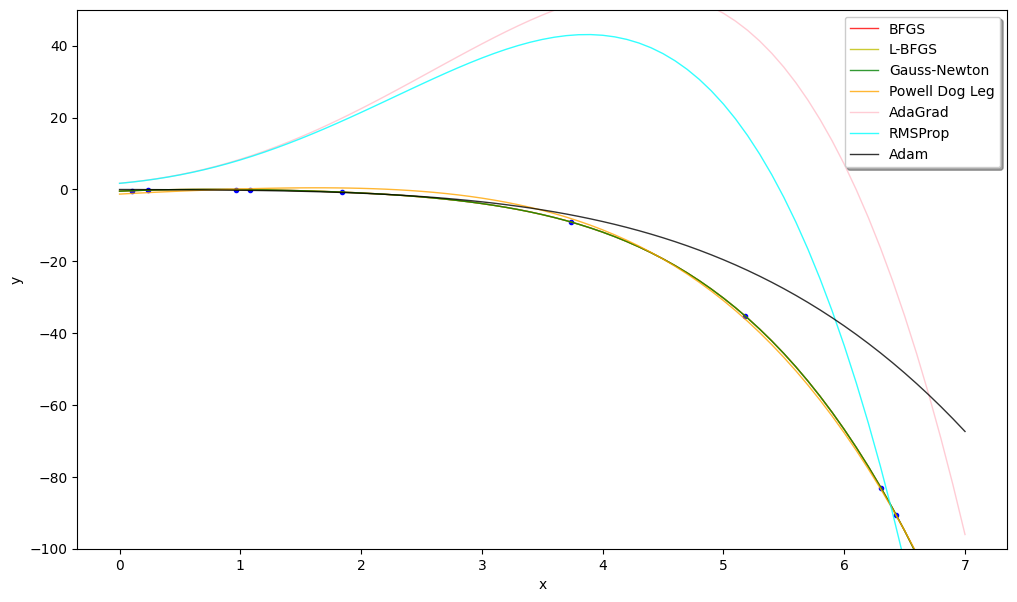

In [255]:
infos = []
ws = []
print(X)

names = ["BFGS", "L-BFGS", "Gauss-Newton", "Powell Dog Leg", "AdaGrad", "RMSProp", "Adam"]
colors = ['r', 'y', 'g', 'orange', 'pink', 'cyan', 'black', 'magenta', 'maroon']
lr = lambda epoch: 0.5 * math.exp(-0.1 * epoch)
maxit = 1000

infos.append(methods.bfgs(f, grad, start.copy(), max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods.l_bfgs(f, grad, start.copy(), max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods.gauss_newton(gauss_f, jacobian, X, y, start.copy(), max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods.trust_region_dogleg(f, grad, hess, start.copy(), max_iter=20))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods2.sgd_adagrad(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods2.sgd_rmsprop(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods2.sgd_adam(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

print_table(infos, names)
make_plot(ws, names, colors)